In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("iris.xls")

In [3]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 5)

In [5]:
df["Classification"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
#to find duplicated rows
duplicates=df[df.duplicated()]
print("Duplicate Rows except first occurrence:\n",duplicates)

Duplicate Rows except first occurrence:
       SL   SW   PL   PW  Classification
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


In [7]:
df = df.drop_duplicates()

# print dataframe after removing duplicates
print(df)

      SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[147 rows x 5 columns]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              140 non-null    float64
 1   SW              141 non-null    float64
 2   PL              141 non-null    float64
 3   PW              147 non-null    float64
 4   Classification  147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [9]:
df['Classification'].value_counts(normalize=True)

Iris-versicolor    0.340136
Iris-virginica     0.333333
Iris-setosa        0.326531
Name: Classification, dtype: float64

In [10]:
df.shape

(147, 5)

In [11]:
#to find null values
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [12]:
print('Iris-setosa')
setosa = df['Classification'] == "Iris-setosa"
print(df[setosa].median())

print('\nIris-versicolor')
versicolor = df['Classification'] == 'Iris-versicolor'
print(df[versicolor].median())
print('\nIris-virginica')
virginica = df['Classification'] == 'Iris-virginica'
print(df[virginica].median())

Iris-setosa
SL    5.0
SW    3.4
PL    1.5
PW    0.2
dtype: float64

Iris-versicolor
SL    5.85
SW    2.80
PL    4.35
PW    1.30
dtype: float64

Iris-virginica
SL    6.5
SW    3.0
PL    5.6
PW    2.0
dtype: float64


C:\Users\Arathi\AppData\Local\Temp\ipykernel_14080\165809233.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[setosa].median())
C:\Users\Arathi\AppData\Local\Temp\ipykernel_14080\165809233.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[versicolor].median())
C:\Users\Arathi\AppData\Local\Temp\ipykernel_14080\165809233.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[virginica].median())


In [13]:
# calculate the median 'SL' for each species and store in a dictionary
median_sl_by_species = df.groupby('Classification')['SL'].median().to_dict()

# fill the NaN values in 'SL' with the median of the corresponding species
df['SL'] = df.apply(lambda x: median_sl_by_species[x['Classification']] if pd.isna(x['SL']) else x['SL'], axis=1)

C:\Users\Arathi\AppData\Local\Temp\ipykernel_14080\2577111705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SL'] = df.apply(lambda x: median_sl_by_species[x['Classification']] if pd.isna(x['SL']) else x['SL'], axis=1)


In [14]:
median_sw_by_species = df.groupby('Classification')['SW'].median().to_dict()

# fill the NaN values in 'SW' with the median of the corresponding species
df['SW'] = df.apply(lambda x: median_sw_by_species[x['Classification']] if pd.isna(x['SW']) else x['SW'], axis=1)

C:\Users\Arathi\AppData\Local\Temp\ipykernel_14080\1856766797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SW'] = df.apply(lambda x: median_sw_by_species[x['Classification']] if pd.isna(x['SW']) else x['SW'], axis=1)


In [15]:
median_pl_by_species = df.groupby('Classification')['PL'].median().to_dict()

# fill the NaN values in 'PL' with the median of the corresponding species
df['PL'] = df.apply(lambda x: median_pl_by_species[x['Classification']] if pd.isna(x['PL']) else x['PL'], axis=1)

C:\Users\Arathi\AppData\Local\Temp\ipykernel_14080\1795947154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PL'] = df.apply(lambda x: median_pl_by_species[x['Classification']] if pd.isna(x['PL']) else x['PL'], axis=1)


In [16]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Classification']=le.fit_transform(df['Classification'])

C:\Users\Arathi\AppData\Local\Temp\ipykernel_14080\2326184876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Classification']=le.fit_transform(df['Classification'])


In [19]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.0,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


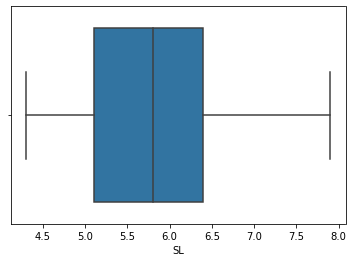

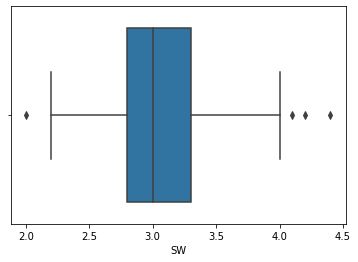

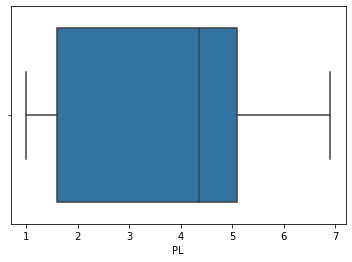

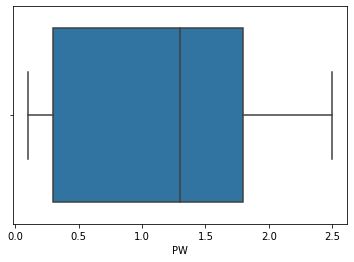

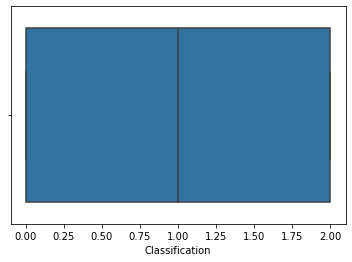

In [20]:
#TO FIND OUTLIERS
for i in df:
    sns.boxplot(x=df[i])
    plt.show()

In [21]:
#to eliminate outliers
from scipy import stats
IQR =stats.iqr(df.SW,interpolation='midpoint')
IQR

0.5

In [22]:
Q1=df.SW.quantile(0.25)
Q3=df.SW.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(2.05, 4.05)

In [23]:
df.loc[df['SW']>max_limit,'SW']=np.median(df.SW)
df.loc[df['SW']<min_limit,'SW']=np.median(df.SW)

In [24]:
df.loc[df.SW>max_limit]

,SL,SW,PL,PW,Classification


In [25]:
df.loc[df.SW<min_limit]

,SL,SW,PL,PW,Classification


In [26]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.0,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
y=df['Classification']
x=df.drop(['Classification'],axis=1)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# LOGISTIC REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model=clf.fit(x_train,y_train)

In [31]:
y_pred=model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy :",accuracy_score(y_test,y_pred))
precision=precision_score(y_test,y_pred,average='weighted')
print("precision :",precision)
recall_score=recall_score(y_test,y_pred,average='weighted')
print("recall_score :",recall_score)
f1_score=f1_score(y_test,y_pred,average='weighted')
print("f1_score :",f1_score)

Accuracy : 0.9666666666666667
precision : 0.9700000000000001
recall_score : 0.9666666666666667
f1_score : 0.9666666666666667


In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
    model=classifier.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [36]:
print( metric_k)

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667]


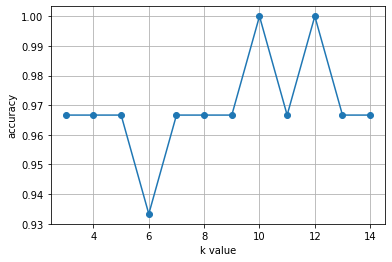

In [37]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [38]:
classifier=KNeighborsClassifier(n_neighbors=10,metric="minkowski",p=2)
model1=classifier.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
acc=accuracy_score(y_test,y_pred1)

In [39]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy :",accuracy_score(y_test,y_pred1))
print("precision :",precision_score(y_test,y_pred1,average="weighted"))
print("recall_score :",recall_score(y_test,y_pred1,average="weighted"))
print("f1_score :",f1_score(y_test,y_pred1,average="weighted"))

Accuracy : 1.0
precision : 1.0
recall_score : 1.0
f1_score : 1.0


# DECISION TREE

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy :",accuracy_score(y_test,y_pred_dt))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_dt))

accuracy : 0.9666666666666667
confusion matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


# random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy :",accuracy_score(y_test,y_pred_rf))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_rf))

accuracy : 0.9333333333333333
confusion matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


# MODEL COMPARISON AND CONCLUSION

# MODEL ACCURACY:      
LOGISTICREGRESSION :0.966
KNN                :1
DECISIONTREE       :0.966
RANDOMFOREST       :0.933

CONCLUSION:
KNN is the best accurate model for the scenerio by comparing other classification models 